<a href="https://colab.research.google.com/github/makarandv/music-emotion-recognition-/blob/master/final_15_3_20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import pdb
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
AUDIO_DIR = '/content/drive/My Drive/Music Dataset/10sec_500songs'

In [ ]:
def get_tids_from_directory(audio_dir):
    """Get track IDs from the mp3s in a directory.
    Parameters
    ----------
    audio_dir : str
        Path to the directory where the audio files are stored.
    Returns
    -------
        A list of track IDs.
    """
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files)
    return tids


def get_audio_path(audio_dir, trackID):
    """
    Return the path to the mp3 given the directory where the audio is stored
    and the track ID.
    Examples
    --------
    >>> import utils
    >>> AUDIO_DIR = os.environ.get('AUDIO_DIR')
    >>> utils.get_audio_path(AUDIO_DIR, 2)
    '../data/fma_small/000/000002.mp3'
    """
    tid_str = '{:01d}'.format(trackID)
    return os.path.join(audio_dir, tid_str + '.mp3')

In [ ]:

tids = get_tids_from_directory(AUDIO_DIR)
print(len(tids))

500


In [ ]:
def create_spectogram(trackID):
    filename = get_audio_path(AUDIO_DIR, trackID)
  
    y, sr = librosa.load(filename)
    spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)
    return spect.T

In [ ]:

def plot_spect(trackID):
    spect = create_spectogram(trackID)
    print(spect.shape)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    print(trackID)

(216, 128)


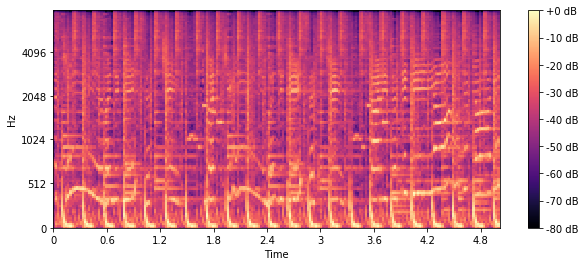

49


In [ ]:
plot_spect(49)

(6133, 128)


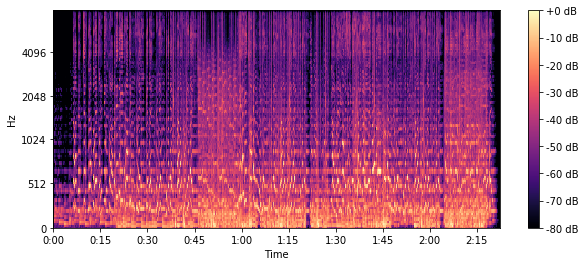

1503


In [ ]:
plot_spect(1503)

(5154, 128)


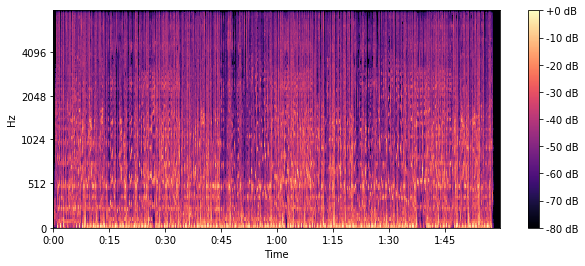

2004


In [ ]:
plot_spect(2004)

In [ ]:
filepath = '/content/drive/My Drive/Music Dataset/10secf - Sheet1(1).csv' 
tracks = pd.read_csv(filepath, index_col=0, header=[0])
tracks.head()


,mood,split
track_id,,
1,Happy,Training
2,Happy,Training
3,Happy,Training
4,Happy,Training
5,Happy,Training


In [ ]:
list(tracks)

['mood', 'split']

In [ ]:
keep_cols = [('mood'),('split')]

df_all = tracks[keep_cols]
#df_all = df_all[df_all[('set', 'subset')] == 'small']
df_all['track_id'] = df_all.index
df_all.head()

,mood,split,track_id
track_id,,,
1,Happy,Training,1
2,Happy,Training,2
3,Happy,Training,3
4,Happy,Training,4
5,Happy,Training,5


In [ ]:
df_all.shape

(500, 3)

In [ ]:
df_all[('split')].value_counts()

Training      350
Validation     75
Testing        75
Name: split, dtype: int64

In [ ]:
df_all[('mood')].unique()

array(['Happy', 'Devotional', 'Sad', 'Romantic', 'Party'], dtype=object)

In [ ]:
dict_moods = {'Happy':1, 'Devotional':2, 'Sad':3, 'Romantic':4, 
               'Party':5  }

In [ ]:
def create_array(df):
    moods = []
    X_spect = np.empty((0, 160, 128))
   
    count = 0
    
    #Code skips records in case of errors
    for index, row in df.iterrows():
     
      try:
          
           count += 1
           
           trackID = int(row['track_id'])
            
           genre = str(row[('mood')])
           spect =create_spectogram(trackID)
           print(spect.shape)
          
            
           # Normalize for small shape differences
           spect = spect[:160, :]
           print(spect.shape)
           X_spect = np.append(X_spect, [spect],axis=0)
           moods.append(dict_moods[genre])
           if count % 25 == 0:
              print("Currently processing: ", count)
      except:
            print("Couldn't process: ", count)
            continue
    y_arr = np.array(moods)
    return X_spect, y_arr


In [ ]:
df_all[('split')].unique()

array(['Training', 'Validation', 'Testing'], dtype=object)

In [ ]:
df_train = df_all[df_all[( 'split')]=='Training']
df_valid = df_all[df_all[('split')]=='Validation']
df_test = df_all[df_all[('split')]=='Testing']

print(df_train.shape, df_valid.shape, df_test.shape)

(350, 3) (75, 3) (75, 3)


In [ ]:
X_train, y_train = create_array(df_train)

(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
Currently processing:  25
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 

In [ ]:
print(X_train.shape, y_train.shape)

(348, 160, 128) (348,)


In [ ]:
print(y_train[:350])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [ ]:
print(X_train)

[[[-34.98648409 -27.80671932 -22.78571249 ... -67.73814969 -78.16108178
   -80.        ]
  [-26.56621134 -12.44012034  -4.66017936 ... -49.65692265 -52.83616428
   -63.4828038 ]
  [-25.19860972  -6.61837652   0.         ... -46.29983962 -50.0640996
   -64.09965357]
  ...
  [-22.20472928 -12.97169521 -11.76370585 ... -53.56492445 -54.88502691
   -67.19154398]
  [-24.02576531 -10.53131982 -10.49168673 ... -42.5454853  -47.71648048
   -55.82062175]
  [-20.65624355 -11.95493006  -9.54958523 ... -45.47078121 -48.48913892
   -61.82784106]]

 [[-77.05114189 -80.         -80.         ... -80.         -80.
   -80.        ]
  [-66.25702097 -62.26874206 -59.36127529 ... -80.         -80.
   -80.        ]
  [-44.1783261  -38.54273762 -37.88346647 ... -80.         -80.
   -80.        ]
  ...
  [-40.95811068 -21.94810508 -11.10674421 ... -50.97063725 -55.95730219
   -63.82140719]
  [-40.35826561 -21.18977205 -11.18140254 ... -49.30929477 -52.97471646
   -62.77227808]
  [-39.55979038 -21.07999003 -11

In [ ]:
X_valid, y_valid = create_array(df_valid)

(217, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(273, 128)
(160, 128)
(209, 128)
(160, 128)
(238, 128)
(160, 128)
(265, 128)
(160, 128)
(240, 128)
(160, 128)
(195, 128)
(160, 128)
(195, 128)
(160, 128)
(252, 128)
(160, 128)
(207, 128)
(160, 128)
(245, 128)
(160, 128)
Currently processing:  25
(226, 128)
(160, 128)
(231, 128)
(160, 128)
(249, 128)
(160, 128)
(199, 128)
(160, 128)
(206, 128)
(160, 128)
(313, 128)
(160, 128)
(374, 128)
(160, 128)
(443, 128)
(160, 128)
(301, 128)
(160, 128)
(492, 128)
(160, 128)
(410, 128)
(160, 128)
(497, 128)
(160, 128)
(591, 128)
(160, 128)
(399, 128)
(160, 128)
(527, 128)
(160, 128)
(822, 128)
(160, 128)
(641, 128)
(160, 128)
(548, 128)
(160, 128)
(729, 128)
(160, 128)
(639, 

In [ ]:
print(y_valid[:75])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]


In [ ]:
print(X_valid)

[[[-42.77066229 -41.10763621 -38.87968291 ... -75.1659814  -78.73760045
   -80.        ]
  [-25.00059075 -15.37308174  -9.51066571 ... -47.57379227 -50.19197686
   -66.54539957]
  [-29.49674993 -18.56817262  -7.64496304 ... -44.68388832 -49.07055545
   -66.09348153]
  ...
  [-30.48324567 -18.10870023 -17.91744659 ... -55.85678035 -63.28856388
   -77.22386469]
  [-25.8120798  -23.7917125  -18.27720243 ... -44.45091378 -43.62686789
   -55.90896589]
  [-14.68597477 -10.23717853  -4.30651355 ... -38.47349988 -42.23582874
   -56.09711461]]

 [[-43.46397268 -44.00559909 -42.16687713 ... -71.31274034 -72.82140542
   -80.        ]
  [-12.74368157  -7.9920632   -6.06006496 ... -42.62601851 -47.00944636
   -57.70588813]
  [ -7.56019133  -3.64264425  -2.15145795 ... -44.59973782 -50.23462206
   -63.02600973]
  ...
  [-12.62746935 -10.5464171  -12.14037578 ... -48.74481395 -52.79802384
   -65.61002561]
  [-14.00728522 -12.65798956 -14.2528352  ... -50.22628567 -55.73253155
   -65.58694752]
  [-12.

In [ ]:
X_test, y_test = create_array(df_test)

(216, 128)
(160, 128)
(217, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(217, 128)
(160, 128)
(217, 128)
(160, 128)
(217, 128)
(160, 128)
(200, 128)
(160, 128)
(173, 128)
(160, 128)
(208, 128)
(160, 128)
(224, 128)
(160, 128)
(230, 128)
(160, 128)
(221, 128)
(160, 128)
(211, 128)
(160, 128)
(227, 128)
(160, 128)
(215, 128)
(160, 128)
(249, 128)
(160, 128)
Currently processing:  25
(217, 128)
(160, 128)
(217, 128)
(160, 128)
(244, 128)
(160, 128)
(211, 128)
(160, 128)
(211, 128)
(160, 128)
(548, 128)
(160, 128)
(820, 128)
(160, 128)
(549, 128)
(160, 128)
(548, 128)
(160, 128)
(1095, 128)
(160, 128)
(1278, 128)
(160, 128)
(367, 128)
(160, 128)
(458, 128)
(160, 128)
(639, 128)
(160, 128)
(649, 128)
(160, 128)
(425, 128)
(160, 128)
(630, 128)
(160, 128)
(492, 128)
(160, 128)
(1136, 128)
(160, 128)
(66

In [ ]:
print(y_test[:75])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]


In [ ]:
np.savez('test_arr', X_test, y_test)

In [ ]:
np.savez('valid_arr', X_valid, y_valid)

In [ ]:
def splitDataFrameIntoSmaller(df, chunkSize = 87): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

In [ ]:
listDf = splitDataFrameIntoSmaller(df_train)
df1_train = listDf[0]
df2_train = listDf[1]
df3_train = listDf[2]
df4_train = listDf[3]
print(df1_train.shape, df2_train.shape, df3_train.shape, df4_train.shape)

(87, 3) (87, 3) (87, 3) (87, 3)


In [ ]:
X_train1, y_train1 = create_array(df1_train)

(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
Currently processing:  25
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 128)
(160, 128)
(217, 128)
(160, 128)
(216, 128)
(160, 128)
(216, 

In [ ]:
np.savez('train1_arr', X_train1, y_train1)

In [ ]:
X_train2, y_train2 = create_array(df2_train)

(256, 128)
(160, 128)
(285, 128)
(160, 128)
(199, 128)
(160, 128)
(225, 128)
(160, 128)
(216, 128)
(160, 128)
(199, 128)
(160, 128)
(251, 128)
(160, 128)
(220, 128)
(160, 128)
(249, 128)
(160, 128)
(204, 128)
(160, 128)
(209, 128)
(160, 128)
(279, 128)
(160, 128)
(159, 128)
(159, 128)
Couldn't process:  13
(256, 128)
(160, 128)
(217, 128)
(160, 128)
(260, 128)
(160, 128)
(221, 128)
(160, 128)
(267, 128)
(160, 128)
(208, 128)
(160, 128)
(216, 128)
(160, 128)
(235, 128)
(160, 128)
(231, 128)
(160, 128)
(231, 128)
(160, 128)
(242, 128)
(160, 128)
(206, 128)
(160, 128)
Currently processing:  25
(447, 128)
(160, 128)
(243, 128)
(160, 128)
(202, 128)
(160, 128)
(198, 128)
(160, 128)
(238, 128)
(160, 128)
(252, 128)
(160, 128)
(238, 128)
(160, 128)
(217, 128)
(160, 128)
(246, 128)
(160, 128)
(3, 128)
(3, 128)
Couldn't process:  35
(265, 128)
(160, 128)
(239, 128)
(160, 128)
(230, 128)
(160, 128)
(226, 128)
(160, 128)
(272, 128)
(160, 128)
(242, 128)
(160, 128)
(234, 128)
(160, 128)
(235, 128)

In [ ]:
np.savez('train2_arr', X_train2, y_train2)

In [ ]:
X_train3, y_train3 = create_array(df3_train)

(305, 128)
(160, 128)
(349, 128)
(160, 128)
(507, 128)
(160, 128)
(823, 128)
(160, 128)
(240, 128)
(160, 128)
(512, 128)
(160, 128)
(257, 128)
(160, 128)
(283, 128)
(160, 128)
(388, 128)
(160, 128)
(388, 128)
(160, 128)
(238, 128)
(160, 128)
(321, 128)
(160, 128)
(288, 128)
(160, 128)
(262, 128)
(160, 128)
(414, 128)
(160, 128)
(326, 128)
(160, 128)
(279, 128)
(160, 128)
(393, 128)
(160, 128)
(333, 128)
(160, 128)
(296, 128)
(160, 128)
(613, 128)
(160, 128)
(427, 128)
(160, 128)
(429, 128)
(160, 128)
(370, 128)
(160, 128)
(433, 128)
(160, 128)
Currently processing:  25
(610, 128)
(160, 128)
(223, 128)
(160, 128)
(277, 128)
(160, 128)
(425, 128)
(160, 128)
(326, 128)
(160, 128)
(613, 128)
(160, 128)
(288, 128)
(160, 128)
(566, 128)
(160, 128)
(294, 128)
(160, 128)
(365, 128)
(160, 128)
(293, 128)
(160, 128)
(230, 128)
(160, 128)
(254, 128)
(160, 128)
(213, 128)
(160, 128)
(240, 128)
(160, 128)
(207, 128)
(160, 128)
(236, 128)
(160, 128)
(247, 128)
(160, 128)
(234, 128)
(160, 128)
(230, 

In [ ]:
print(X_train3.shape, y_train3.shape)

(87, 160, 128) (87,)


In [ ]:
np.savez('train3_arr', X_train3, y_train3)

In [ ]:
X_train4, y_train4 = create_array(df4_train)

(206, 128)
(160, 128)
(218, 128)
(160, 128)
(204, 128)
(160, 128)
(236, 128)
(160, 128)
(222, 128)
(160, 128)
(221, 128)
(160, 128)
(215, 128)
(160, 128)
(221, 128)
(160, 128)
(229, 128)
(160, 128)
(223, 128)
(160, 128)
(231, 128)
(160, 128)
(227, 128)
(160, 128)
(215, 128)
(160, 128)
(218, 128)
(160, 128)
(218, 128)
(160, 128)
(228, 128)
(160, 128)
(213, 128)
(160, 128)
(211, 128)
(160, 128)
(227, 128)
(160, 128)
(186, 128)
(160, 128)
(197, 128)
(160, 128)
(199, 128)
(160, 128)
(195, 128)
(160, 128)
(184, 128)
(160, 128)
(180, 128)
(160, 128)
Currently processing:  25
(178, 128)
(160, 128)
(199, 128)
(160, 128)
(180, 128)
(160, 128)
(197, 128)
(160, 128)
(204, 128)
(160, 128)
(202, 128)
(160, 128)
(193, 128)
(160, 128)
(189, 128)
(160, 128)
(206, 128)
(160, 128)
(210, 128)
(160, 128)
(195, 128)
(160, 128)
(199, 128)
(160, 128)
(195, 128)
(160, 128)
(175, 128)
(160, 128)
(195, 128)
(160, 128)
(197, 128)
(160, 128)
(193, 128)
(160, 128)
(191, 128)
(160, 128)
(181, 128)
(160, 128)
(212, 

In [ ]:
np.savez('train4_arr', X_train4, y_train4)

In [ ]:
print(X_train4.shape, y_train4.shape)

(87, 160, 128) (87,)


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/train1_arr.npz')
print(npzfile.files)
X_train1 = npzfile['arr_0']
y_train1 = npzfile['arr_1']
print(X_train1.shape, y_train1.shape)

['arr_0', 'arr_1']
(87, 160, 128) (87,)


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/train2_arr.npz')
print(npzfile.files)
X_train2 = npzfile['arr_0']
y_train2 = npzfile['arr_1']
print(X_train2.shape, y_train2.shape)

['arr_0', 'arr_1']
(85, 160, 128) (85,)


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/train3_arr.npz')
print(npzfile.files)
X_train3 = npzfile['arr_0']
y_train3 = npzfile['arr_1']
print(X_train3.shape, y_train3.shape)

['arr_0', 'arr_1']
(87, 160, 128) (87,)


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/train4_arr.npz')
print(npzfile.files)
X_train4 = npzfile['arr_0']
y_train4 = npzfile['arr_1']
print(X_train4.shape, y_train4.shape)

['arr_0', 'arr_1']
(87, 160, 128) (87,)


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/valid_arr.npz')
print(npzfile.files)
X_valid = npzfile['arr_0']
y_valid = npzfile['arr_1']
print(X_valid.shape, y_valid.shape)

['arr_0', 'arr_1']
(75, 160, 128) (75,)


In [ ]:
X_train = np.concatenate((X_train1, X_train2, X_train3, X_train4), axis = 0)
y_train = np.concatenate((y_train1, y_train2, y_train3, y_train4), axis = 0)
print(X_train.shape, y_train.shape)


(346, 160, 128) (346,)


In [ ]:
## Convert y data from scale 0-7
print(np.amin(X_train), np.amax(X_train), np.mean(X_train))
y_train = y_train -1
y_valid = y_valid -1
print(np.amin(y_train), np.amax(y_train), np.mean(y_train))

-80.0 0.0 -39.10545856985884
0 4 1.9942196531791907


In [ ]:
### Convert the scale of training data
X_train_raw = librosa.core.db_to_power(X_train, ref=1.0)
print(np.amin(X_train_raw), np.amax(X_train_raw), np.mean(X_train_raw))

1e-08 1.0 0.005086861505526967


In [ ]:
X_train_log = np.log(X_train_raw)
print(np.amin(X_train_log), np.amax(X_train_log), np.mean(X_train_log))

-18.420680743952367 0.0 -9.00436459576533


In [ ]:
X_valid_raw = librosa.core.db_to_power(X_valid, ref=1.0)
X_valid_log = np.log(X_valid_raw)

In [ ]:
 def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X_train, y_train = unison_shuffled_copies(X_train_log, y_train)
X_valid, y_valid = unison_shuffled_copies(X_valid_log, y_valid)


In [ ]:
print("Shapes are: ", X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

Shapes are:  (346, 160, 128) (75, 160, 128) (346,) (75,)


In [ ]:
#don't run
np.savez('shuffled_train', X_train, y_train)
np.savez('shuffled_valid', X_valid, y_valid)

In [ ]:
import numpy as np
import os
from os.path import isfile
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Bidirectional, LSTM, Dropout, Activation, GRU
from keras.layers import Conv2D, concatenate, MaxPooling2D, Flatten, Embedding, Lambda


from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras import backend as K
from keras.utils import np_utils
from keras.optimizers import Adam, RMSprop

from keras import regularizers


import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dict_genres = {'Happy':1, 'Devotional':2, 'Sad':3, 'Romantic':4, 
               'Party':5 }


reverse_map = {v: k for k, v in dict_genres.items()}
print(reverse_map)


{1: 'Happy', 2: 'Devotional', 3: 'Sad', 4: 'Romantic', 5: 'Party'}


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/shuffled_train.npz')
print(npzfile.files)
X_train = npzfile['arr_0']
y_train = npzfile['arr_1']
print(X_train.shape, y_train.shape)


['arr_0', 'arr_1']
(346, 160, 128) (346,)


In [ ]:
print(y_train)

[2 0 0 0 3 3 2 0 3 0 3 3 0 3 4 2 2 2 4 1 4 2 3 1 0 0 1 4 0 4 4 4 1 0 3 1 0
 2 0 4 0 3 2 3 0 2 0 3 1 3 0 4 1 4 2 2 1 1 1 4 1 1 2 2 0 2 3 1 3 0 1 2 1 3
 3 4 3 2 0 4 1 1 4 3 0 4 4 0 2 3 1 2 4 1 0 4 4 3 3 4 2 2 1 1 2 2 3 3 1 0 4
 4 3 2 1 0 4 3 2 1 2 2 0 0 4 1 3 0 3 1 3 3 1 2 0 2 4 2 3 3 3 3 3 0 1 0 2 4
 3 3 0 4 4 3 3 0 0 3 2 3 4 2 0 1 4 3 2 2 3 3 0 4 2 2 2 4 2 3 3 0 0 4 1 3 3
 1 1 1 2 0 2 3 0 4 2 0 4 1 0 3 4 3 3 1 3 4 4 4 4 1 1 1 2 1 3 4 1 0 2 1 4 2
 3 0 1 3 0 0 4 1 3 1 3 1 4 4 0 0 0 2 0 3 4 0 3 2 1 1 2 1 1 1 0 0 2 1 2 1 4
 2 4 1 1 3 0 4 2 2 4 1 3 0 4 2 1 4 4 4 0 4 2 1 3 4 0 1 4 1 1 0 3 4 0 0 2 3
 4 4 0 2 1 3 2 2 4 1 2 4 1 0 1 2 4 4 0 4 3 1 3 2 2 4 2 3 2 0 2 2 0 4 2 2 2
 0 0 0 2 0 0 1 4 1 0 3 3 1]


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np.array([[0, 1, 1, 1, 1], [1, 0, 0, 0, 0]]))
#LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
lb.classes_
#array([0, 1, 2, 3, 4])
y_train = lb.transform([2, 0, 0, 0, 3, 3, 2, 0, 3, 0, 3, 3, 0, 3, 4, 2, 2, 2, 4, 1, 4, 2, 3, 1, 0, 0, 1, 4, 0, 4, 4, 4, 1, 0, 3, 1, 0,
 2, 0, 4, 0, 3, 2, 3, 0, 2, 0, 3, 1, 3, 0, 4, 1, 4, 2, 2, 1, 1, 1, 4, 1, 1, 2, 2, 0, 2, 3, 1, 3, 0, 1, 2, 1, 3,
 3, 4, 3, 2, 0, 4, 1, 1, 4, 3, 0, 4, 4, 0, 2, 3, 1, 2, 4, 1, 0, 4, 4, 3, 3, 4, 2, 2, 1, 1, 2, 2, 3, 3, 1, 0, 4,
 4, 3, 2, 1, 0, 4, 3, 2, 1, 2, 2, 0, 0, 4, 1, 3, 0, 3, 1, 3, 3, 1, 2, 0, 2, 4, 2, 3, 3, 3, 3, 3, 0, 1, 0, 2, 4,
 3, 3, 0, 4, 4, 3, 3, 0, 0, 3, 2, 3, 4, 2, 0, 1, 4, 3, 2, 2, 3, 3, 0, 4, 2, 2, 2, 4, 2, 3, 3, 0, 0, 4, 1, 3, 3,
 1, 1, 1, 2, 0, 2, 3, 0, 4, 2, 0, 4, 1, 0, 3, 4, 3, 3, 1, 3, 4, 4, 4, 4, 1, 1, 1, 2, 1, 3, 4, 1, 0, 2, 1, 4, 2,
 3, 0, 1, 3, 0, 0, 4, 1, 3, 1, 3, 1, 4, 4, 0, 0, 0, 2, 0, 3, 4, 0, 3, 2, 1, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 4,
 2, 4, 1, 1, 3, 0, 4, 2, 2, 4, 1, 3, 0, 4, 2, 1, 4, 4, 4, 0, 4, 2, 1, 3, 4, 0, 1, 4, 1, 1, 0, 3, 4, 0, 0, 2, 3,
 4, 4, 0, 2, 1, 3, 2, 2, 4, 1, 2, 4, 1, 0, 1, 2, 4, 4, 0, 4, 3, 1, 3, 2, 2, 4, 2, 3, 2, 0, 2, 2, 0, 4, 2, 2, 2,
 0, 0, 0, 2, 0, 0, 1, 4, 1, 0, 3, 3, 1])

In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/shuffled_valid.npz')
print(npzfile.files)
X_valid = npzfile['arr_0']
y_valid = npzfile['arr_1']
print(X_valid.shape, y_valid.shape)

['arr_0', 'arr_1']
(75, 160, 128) (75,)


In [ ]:
print(y_valid)

[3 2 2 1 2 0 1 0 2 3 4 2 4 4 1 1 2 4 3 2 3 3 4 1 1 1 2 3 1 3 0 2 0 0 0 0 2
 4 3 0 4 0 2 4 0 3 4 4 4 2 3 0 2 3 2 1 0 0 4 3 1 1 1 0 3 1 0 1 4 4 3 4 2 1
 3]


In [ ]:
batch_size = 8
num_classes = 5
n_features = X_train.shape[2]
n_time = X_train.shape[1]

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np.array([[0, 1, 1, 1, 1], [1, 0, 0, 0, 0]]))
#LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
lb.classes_
#array([0, 1, 2, 3, 4])
y_valid = lb.transform([3, 2, 2, 1, 2, 0, 1, 0, 2, 3, 4, 2, 4, 4, 1, 1, 2, 4, 3, 2, 3, 3, 4, 1, 1, 1, 2, 3, 1, 3, 0, 2, 0, 0, 0, 0, 2,
 4, 3, 0, 4, 0, 2, 4, 0, 3, 4, 4, 4, 2, 3, 0, 2, 3, 2, 1, 0, 0, 4, 3, 1, 1, 1, 0, 3, 1, 0, 1, 4, 4, 3, 4, 2, 1,
 3])
print(y_train)

[[0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 1 0 0 0]]


In [ ]:
nb_filters1=16
nb_filters2=32
nb_filters3=64
nb_filters4=64
nb_filters5=64
ksize = (3,1)
pool_size_1= (2,2) 
pool_size_2= (4,4)
pool_size_3 = (4,2)

dropout_prob = 0.20
dense_size1 = 128
lstm_count = 64
num_units = 120

BATCH_SIZE = 32
EPOCH_COUNT = 50
L2_regularization = 0.001

def conv_recurrent_model_build(model_input):
    print('Building model...')
    layer = model_input
    
    ### Convolutional blocks
    conv_1 = Conv2D(filters = nb_filters1, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_1')(layer)
    pool_1 = MaxPooling2D(pool_size_1)(conv_1)

    conv_2 = Conv2D(filters = nb_filters2, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_2')(pool_1)
    pool_2 = MaxPooling2D(pool_size_1)(conv_2)

    conv_3 = Conv2D(filters = nb_filters3, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_3')(pool_2)
    pool_3 = MaxPooling2D(pool_size_1)(conv_3)
    
    
    conv_4 = Conv2D(filters = nb_filters4, kernel_size = ksize, strides=1,
                      padding= 'valid', activation='relu', name='conv_4')(pool_3)
    pool_4 = MaxPooling2D(pool_size_2)(conv_4)
    
    
   # conv_5 = Conv2D(filters = nb_filters5, kernel_size = ksize, strides=1,
                  #    padding= 'valid', activation='relu', name='conv_5')(pool_4)
   # pool_5 = MaxPooling2D(pool_size_2)(conv_5)

    flatten1 = Flatten()(pool_4)
    ### Recurrent Block
    
    # Pooling layer
    pool_lstm1 = MaxPooling2D(pool_size_3, name = 'pool_lstm')(layer)
    
    # Embedding layer

    squeezed = Lambda(lambda x: K.squeeze(x, axis= -1))(pool_lstm1)
#     flatten2 = K.squeeze(pool_lstm1, axis = -1)
#     dense1 = Dense(dense_size1)(flatten)
    
    # Bidirectional GRU
    lstm = Bidirectional(GRU(lstm_count))(squeezed)  #default merge mode is concat
    
    # Concat Output
    concat = concatenate([flatten1, lstm], axis=-1, name ='concat')
    
    ## Softmax Output
    output = Dense(num_classes, activation = 'softmax', name='preds')(concat)
    
    model_output = output
    model = Model(model_input, model_output)
    
#     opt = Adam(lr=0.001)
    opt = RMSprop(lr=0.0005)  # Optimizer
    model.compile(
            loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy']
        )
    
    print(model.summary())
    return model

In [ ]:
def train_model(x_train, y_train, x_val, y_val):
    
    n_frequency = 128
    n_frames = 160
    #reshape and expand dims for conv2d
#     x_train = x_train.reshape(-1, n_frequency, n_frames)
    x_train = np.expand_dims(x_train, axis = -1)
    
#     x_val = x_val.reshape(-1, n_frequency, n_frames)
    x_val = np.expand_dims(x_val, axis = -1)
    
    
    input_shape = (n_frames, n_frequency, 1)
    model_input = Input(input_shape, name='input')
    
    model = conv_recurrent_model_build(model_input)
    
#     tb_callback = TensorBoard(log_dir='./logs/4', histogram_freq=1, batch_size=32, write_graph=True, write_grads=False,
#                               write_images=False, embeddings_freq=0, embeddings_layer_names=None,
#                               embeddings_metadata=None)
    checkpoint_callback = ModelCheckpoint('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/weights.best(1).h5', monitor='val_acc', verbose=1,
                                          save_best_only=True, mode='max')
    
    reducelr_callback = ReduceLROnPlateau(
                monitor='val_acc', factor=0.5, patience=10, min_delta=0.01,
                verbose=1
            )
    callbacks_list = [checkpoint_callback, reducelr_callback]

    # Fit the model and get training history.
    print('Training...')
    history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCH_COUNT, validation_data=(x_val, y_val), verbose=1, callbacks=callbacks_list)

    return model, history


In [ ]:
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
model, history  = train_model(X_train, y_train, X_valid, y_valid)

Building model...
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 160, 128, 1)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 158, 128, 16) 64          input[0][0]                      
__________________________________________________________________________________________________
max_pooling2d_13 (MaxPooling2D) (None, 79, 64, 16)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 77, 64, 32)   1568        max_pooling2d_13[0][0]           
__________________________________________________________________________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


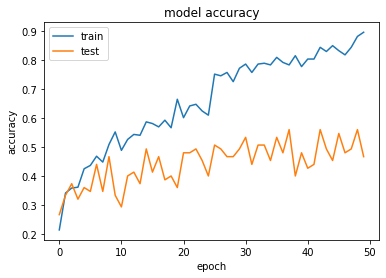

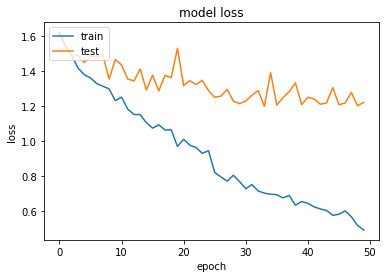

In [ ]:
show_summary_stats(history)

In [ ]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_valid, axis = 1)
X_valid = np.expand_dims(X_valid, axis = -1)
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4]
target_names = dict_genres.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(75,) (75,)
              precision    recall  f1-score   support

       Happy       0.32      0.73      0.45        15
  Devotional       0.67      0.53      0.59        15
         Sad       0.50      0.47      0.48        15
    Romantic       0.67      0.27      0.38        15
       Party       0.56      0.33      0.42        15

    accuracy                           0.47        75
   macro avg       0.54      0.47      0.46        75
weighted avg       0.54      0.47      0.46        75



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))

0.4666666666666667


In [ ]:
npzfile = np.load('/content/drive/My Drive/Music Dataset/NPZ_10 Sec/test_arr.npz')
print(npzfile.files)
X_test = npzfile['arr_0']
y_test = npzfile['arr_1']
print(X_test.shape, y_test.shape)

['arr_0', 'arr_1']
(75, 160, 128) (75,)


In [ ]:
from keras.models import load_model

weights_path = '/content/drive/My Drive/Music Dataset/NPZ_10 Sec/weights.best(1).h5'
model = load_model(weights_path)

In [ ]:
y_test -= 1
print(np.amin(y_test), np.amax(y_test), np.mean(y_test))

0 4 2.0


In [ ]:
X_test_raw = librosa.core.db_to_power(X_test, ref=1.0)
print(np.amin(X_test_raw), np.amax(X_test_raw), np.mean(X_test_raw))

1e-08 1.0 0.004814967323228272


In [ ]:
X_test = np.log(X_test_raw)


from sklearn.metrics import classification_report

y_true = y_test
X_test = np.expand_dims(X_test, axis = -1)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
labels = [0,1,2,3,4]
target_names = dict_genres.keys()

print(y_true.shape, y_pred.shape)
print(classification_report(y_true, y_pred, target_names=target_names))

(75,) (75,)
              precision    recall  f1-score   support

       Happy       0.27      0.20      0.23        15
  Devotional       0.50      0.07      0.12        15
         Sad       0.48      0.67      0.56        15
    Romantic       0.38      0.40      0.39        15
       Party       0.48      0.80      0.60        15

    accuracy                           0.43        75
   macro avg       0.42      0.43      0.38        75
weighted avg       0.42      0.43      0.38        75



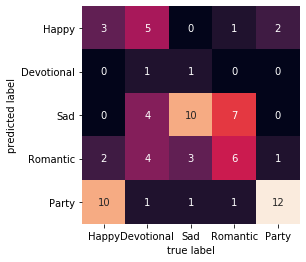

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dict_genres.keys(),
            yticklabels=dict_genres.keys())
plt.xlabel('true label')
plt.ylabel('predicted label');